<a href="https://colab.research.google.com/github/Gan-Claire/Project_melomane/blob/main/DataCleaning_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is for data cleaning and data analysis:
- import data
- clean nan values
- normallize unique variables
- plot distribution of different variables
- create dummy variable for genre and find correlation

In [ ]:
#needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_name = 'genres_v2.csv'
original_df = pd.read_csv(file_name)
original_df.head()

<ipython-input-2-cf31e6c5fa61>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(file_name)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
#printing all column names
print(original_df.columns.tolist())

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title']


In [ ]:
#drop columns that are not needed
columns_to_drop = ['uri', 'Unnamed: 0', 'title', 'time_signature', 'track_href', 'analysis_url', 'id', 'type', 'song_name']

organized_df = original_df.drop(columns=columns_to_drop)


In [ ]:
organized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  genre             42305 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 4.2+ MB


In [ ]:
#stat of the original data
organized_df.describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underground Rap
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5875
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,NaN
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,NaN
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,NaN
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,NaN
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,NaN


In [ ]:
#check if there is any nan values
print(organized_df.isna().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64


In [ ]:
#list of genres
print(organized_df['genre'].unique())

['Dark Trap' 'Underground Rap' 'Trap Metal' 'Emo' 'Rap' 'RnB' 'Pop'
 'Hiphop' 'techhouse' 'techno' 'trance' 'psytrance' 'trap' 'dnb'
 'hardstyle']


In [ ]:
#normalize all variables
organized_df['duration_normal'] = organized_df['duration_ms'] / organized_df['duration_ms'].max()
organized_df['tempo_normal'] = organized_df['tempo'] / organized_df['tempo'].max()
organized_df['loudness_normal'] = (organized_df['loudness'] - organized_df['loudness'].min()) / (organized_df['loudness'].max() - organized_df['loudness'].min())


In [ ]:
#make a copy and drop un-normalized column
normalized_df = organized_df.copy()
columns_drop = ['tempo', 'duration_ms','loudness']

normalized_df = normalized_df.drop(columns=columns_drop)
normalized_df.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,genre,duration_normal,tempo_normal,loudness_normal
0,0.831,0.814,2,1,0.4200,0.0598,0.013400,0.0556,0.3890,Dark Trap,0.136399,0.712629,0.712039
1,0.719,0.493,8,1,0.0794,0.4010,0.000000,0.1180,0.1240,Dark Trap,0.245799,0.522402,0.715710
2,0.850,0.893,5,1,0.0623,0.0138,0.000004,0.3720,0.0391,Dark Trap,0.108232,0.989832,0.782742
3,0.476,0.781,0,1,0.1030,0.0237,0.000000,0.1140,0.1750,Dark Trap,0.135437,0.848645,0.784742
4,0.798,0.624,2,1,0.2930,0.2170,0.000000,0.1660,0.5910,Dark Trap,0.135039,0.671787,0.703712


In [ ]:
#show basic stats of each variables
normalized_df.describe(include='all')

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,genre,duration_normal,tempo_normal,loudness_normal
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305,42305.000000,42305.000000,42305.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underground Rap,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5875,NaN,NaN,NaN
mean,0.639364,0.762516,5.370240,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,NaN,0.274755,0.669454,0.736654
std,0.156617,0.183823,3.666145,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,NaN,0.112762,0.108242,0.080569
min,0.065100,0.000243,0.000000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,NaN,0.028038,0.263139,0.000000
25%,0.524000,0.632000,1.000000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,NaN,0.196966,0.589818,0.690207
50%,0.646000,0.803000,6.000000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,NaN,0.246163,0.658101,0.742994
75%,0.766000,0.923000,9.000000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,NaN,0.329809,0.732961,0.790138


In [ ]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   mode              42305 non-null  int64  
 4   speechiness       42305 non-null  float64
 5   acousticness      42305 non-null  float64
 6   instrumentalness  42305 non-null  float64
 7   liveness          42305 non-null  float64
 8   valence           42305 non-null  float64
 9   genre             42305 non-null  object 
 10  duration_normal   42305 non-null  float64
 11  tempo_normal      42305 non-null  float64
 12  loudness_normal   42305 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 4.2+ MB


In [ ]:
#show correlation
normalized_df.corr()

<ipython-input-13-32ba57c0a50a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalized_df.corr()


,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_normal,tempo_normal,loudness_normal
danceability,1.000000,-0.323248,-0.012708,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.049807,-0.165929,-0.216776
energy,-0.323248,1.000000,0.044731,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,0.294464,-0.024504,0.601540
key,-0.012708,0.044731,1.000000,-0.248283,-0.030634,-0.004937,0.068266,0.002753,0.028600,0.069255,-0.009862,-0.006810
mode,0.084413,-0.032203,-0.248283,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.031253,-0.012191,-0.004744
speechiness,0.182177,-0.148363,-0.030634,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,-0.309892,0.164674,0.048035
acousticness,0.069910,-0.497334,-0.004937,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,-0.246681,0.055643,-0.283876
instrumentalness,-0.067114,0.303875,0.068266,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,0.603784,-0.207667,-0.187933
liveness,-0.196702,0.231754,0.002753,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.010594,0.028327,0.167104
valence,0.369845,-0.013520,0.028600,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,-0.191093,0.058374,0.080916
duration_normal,-0.049807,0.294464,0.069255,-0.031253,-0.309892,-0.246681,0.603784,0.010594,-0.191093,1.000000,-0.156961,-0.095999


In [ ]:
#mean of differenct genre
normalized_df.groupby('genre').mean()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_normal,tempo_normal,loudness_normal
genre,,,,,,,,,,,,
Dark Trap,0.618834,0.646851,5.298384,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,0.205582,0.679973,0.694661
Emo,0.493699,0.761175,5.052976,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,0.239107,0.698573,0.764919
Hiphop,0.698982,0.654418,5.553170,0.527741,0.217150,0.195569,0.017154,0.210581,0.523628,0.249662,0.739845,0.721600
Pop,0.676807,0.697638,5.399132,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,0.231523,0.690449,0.759483
Rap,0.742877,0.620083,5.048701,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,0.222340,0.572002,0.725104
RnB,0.674206,0.598884,5.021915,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,0.247962,0.715120,0.724753
Trap Metal,0.647564,0.749157,4.663088,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,0.161212,0.674951,0.752716
Underground Rap,0.744658,0.635776,5.059064,0.613617,0.224992,0.162708,0.025280,0.191116,0.444629,0.192927,0.694151,0.712093
dnb,0.520944,0.873433,5.619016,0.446055,0.083478,0.019543,0.459998,0.202883,0.253062,0.313836,0.789183,0.802459


danceability           Axes(0.125,0.712609;0.168478x0.167391)
energy              Axes(0.327174,0.712609;0.168478x0.167391)
key                 Axes(0.529348,0.712609;0.168478x0.167391)
mode                Axes(0.731522,0.712609;0.168478x0.167391)
speechiness            Axes(0.125,0.511739;0.168478x0.167391)
acousticness        Axes(0.327174,0.511739;0.168478x0.167391)
instrumentalness    Axes(0.529348,0.511739;0.168478x0.167391)
liveness            Axes(0.731522,0.511739;0.168478x0.167391)
valence                 Axes(0.125,0.31087;0.168478x0.167391)
duration_normal      Axes(0.327174,0.31087;0.168478x0.167391)
tempo_normal         Axes(0.529348,0.31087;0.168478x0.167391)
loudness_normal      Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

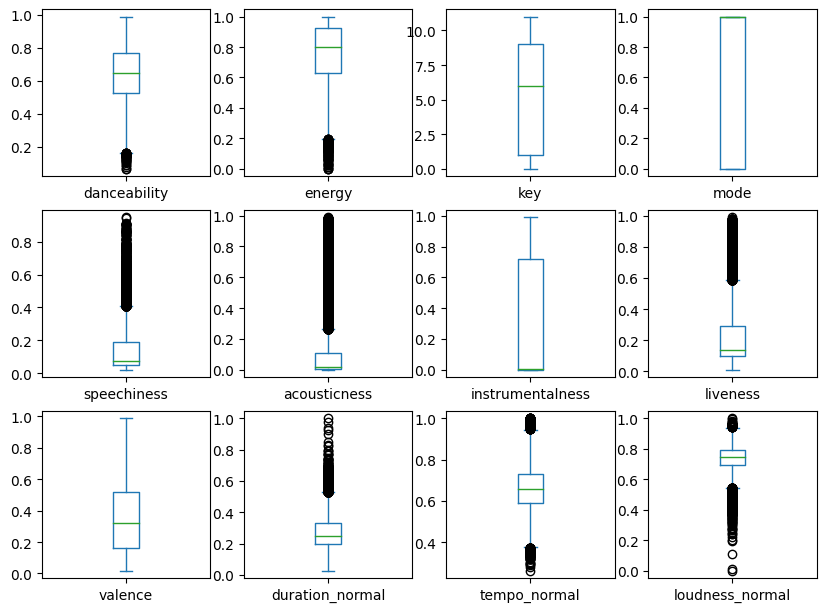

In [ ]:
#Change layout? what is our target variable for box plots? just little lost on meaning of this data here :(
normalized_df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False, figsize=(10,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

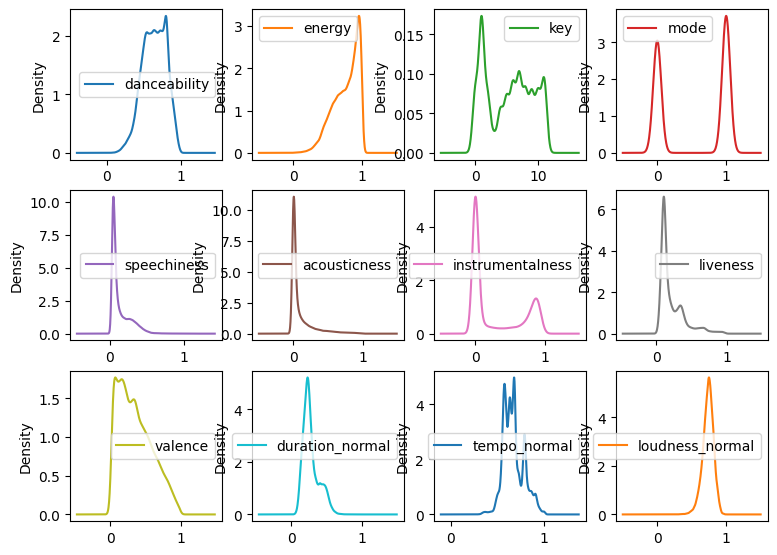

In [ ]:
#Change layout?
normalized_df.plot(kind ='density',subplots = True, layout =(4,4),sharex = False, figsize=(9,9))

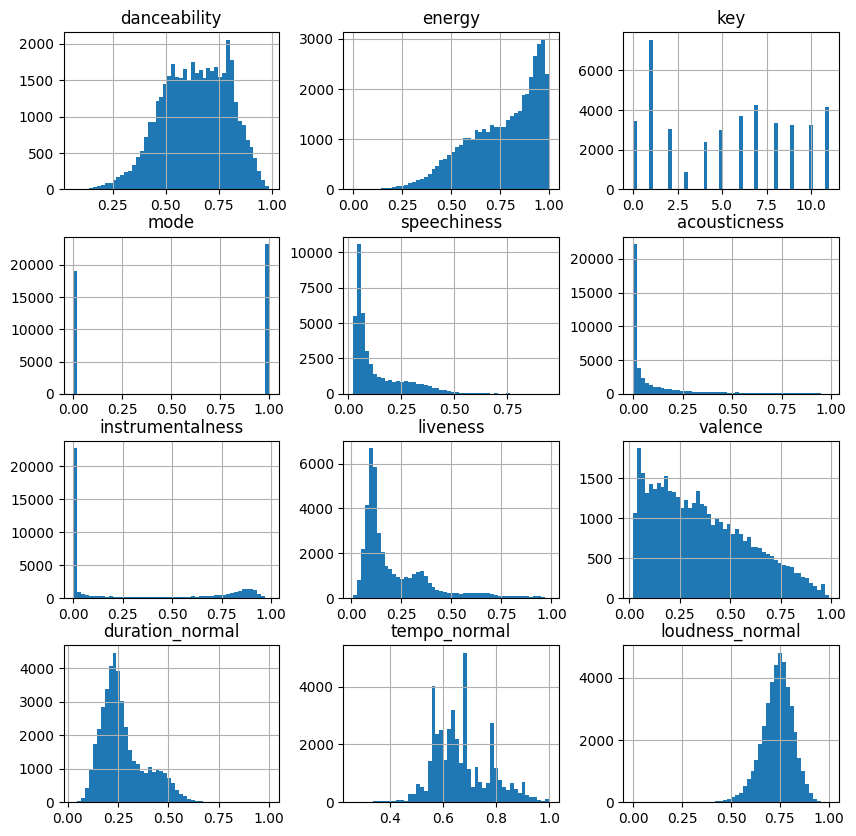

In [ ]:
normalized_df.hist(figsize=(10,10),bins=50)
plt.show()

<ipython-input-18-523c7653e407>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dummy.corr()


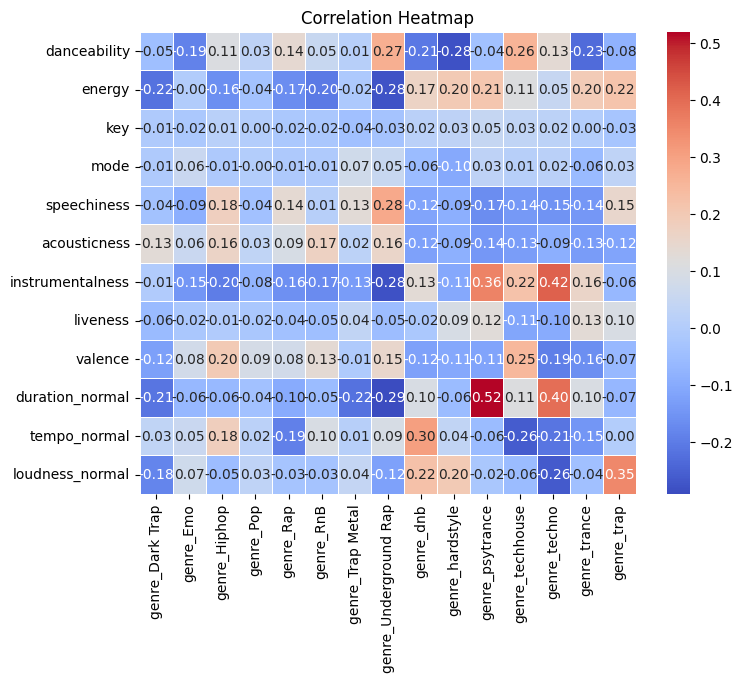

In [ ]:
#correlation between each genre and different variables

dummy_genres = pd.get_dummies(normalized_df['genre'], prefix='genre')

# Concatenate the dummy variables with the original DataFrame
df_dummy = pd.concat([normalized_df, dummy_genres], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_dummy.corr()
to_drop_col1 = normalized_df.columns.tolist()
to_drop_col = [item for item in to_drop_col1 if item != 'genre']
correlation_matrix = correlation_matrix.drop(columns=to_drop_col)

to_drop_row = correlation_matrix.columns.tolist()
correlation_matrix = correlation_matrix.drop(index=to_drop_row)

#drop duplicate columns

# Create a correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-19-dda72838892d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = normalized_df.corr()


<Axes: >

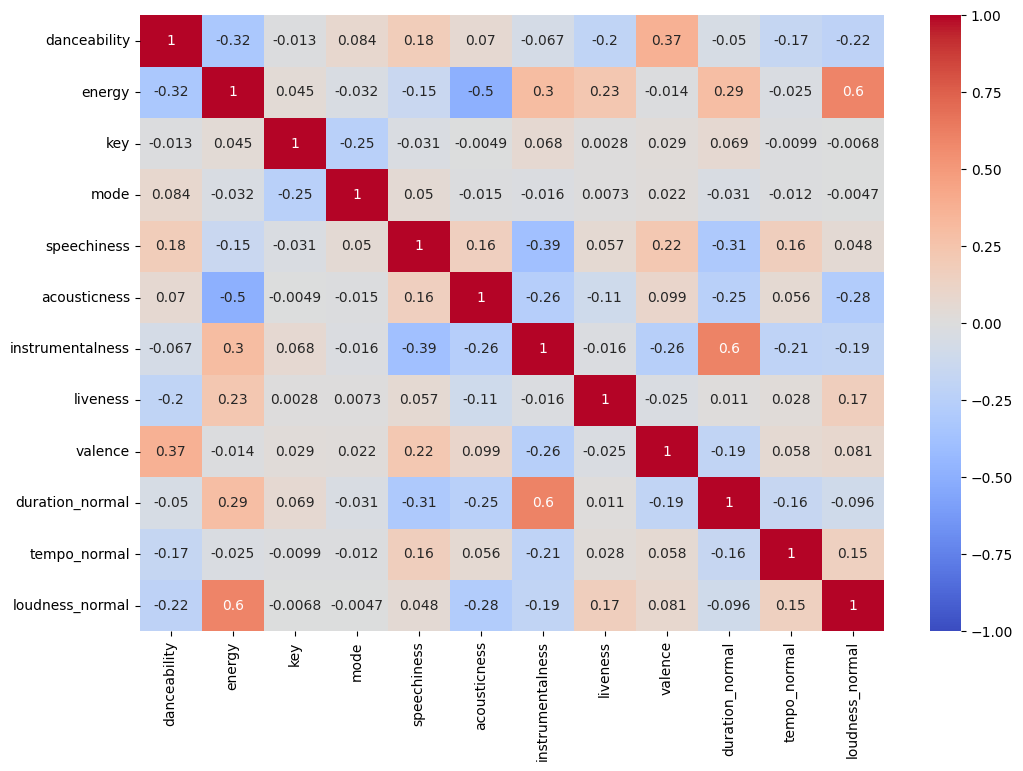

In [ ]:
#individual variables correlation
map_color = 'coolwarm'
corr = normalized_df.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True,vmin = -1, vmax = 1,center = 0,cmap=map_color)

#save image
#plt.savefig('heatmap.png', dpi=300)

In [ ]:
#export csv
normalized_df.to_csv("normalized_data.csv")

In [ ]:
genre_count = normalized_df['genre'].value_counts() #data is not even for classification, so i will connect spotify api and just grab a ton of even data from a bunch of genres

In [ ]:
genre_count

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Dark Trap'),
  Text(1, 0, 'Underground Rap'),
  Text(2, 0, 'Trap Metal'),
  Text(3, 0, 'Emo'),
  Text(4, 0, 'Rap'),
  Text(5, 0, 'RnB'),
  Text(6, 0, 'Pop'),
  Text(7, 0, 'Hiphop'),
  Text(8, 0, 'techhouse'),
  Text(9, 0, 'techno'),
  Text(10, 0, 'trance'),
  Text(11, 0, 'psytrance'),
  Text(12, 0, 'trap'),
  Text(13, 0, 'dnb'),
  Text(14, 0, 'hardstyle')])

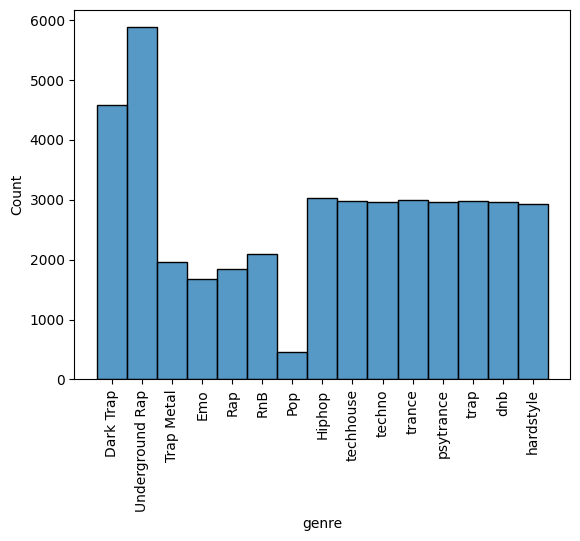

In [ ]:
sns.histplot(normalized_df['genre'])
plt.xticks(rotation=90)

In [ ]:
bins = [0, 0.3, 0.6, 1]
labels = ['short', 'medium', 'long']
normalized_df['duration_bins'] = pd.cut(normalized_df['duration_normal'], bins=bins, labels=labels)


In [ ]:
normalized_df['energy_danceability_interaction'] = normalized_df['energy'] * normalized_df['danceability']


In [ ]:
bins = [-float('inf'), -0.5, 0, float('inf')]
labels = ['soft', 'medium', 'loud']
normalized_df['loudness_level'] = pd.cut(normalized_df['loudness_normal'], bins=bins, labels=labels)


In [ ]:

bins = [0, 0.4, 0.6, 1]
labels = ['slow', 'medium', 'fast']
normalized_df['tempo_category'] = pd.cut(normalized_df['tempo_normal'], bins=bins, labels=labels)


In [ ]:
normalized_df['high_speechiness'] = (normalized_df['speechiness'] > 0.5).astype(int)


In [ ]:
print(normalized_df.head())


   danceability  energy  key  mode  speechiness  acousticness  \
0         0.831   0.814    2     1       0.4200        0.0598   
1         0.719   0.493    8     1       0.0794        0.4010   
2         0.850   0.893    5     1       0.0623        0.0138   
3         0.476   0.781    0     1       0.1030        0.0237   
4         0.798   0.624    2     1       0.2930        0.2170   

   instrumentalness  liveness  valence      genre  duration_normal  \
0          0.013400    0.0556   0.3890  Dark Trap         0.136399   
1          0.000000    0.1180   0.1240  Dark Trap         0.245799   
2          0.000004    0.3720   0.0391  Dark Trap         0.108232   
3          0.000000    0.1140   0.1750  Dark Trap         0.135437   
4          0.000000    0.1660   0.5910  Dark Trap         0.135039   

   tempo_normal  loudness_normal duration_bins  \
0      0.712629         0.712039         short   
1      0.522402         0.715710         short   
2      0.989832         0.782742      

In [ ]:

print(normalized_df[['duration_bins', 'energy_danceability_interaction', 'loudness_level', 'tempo_category', 'high_speechiness']].head())


  duration_bins  energy_danceability_interaction loudness_level  \
0         short                         0.676434           loud   
1         short                         0.354467           loud   
2         short                         0.759050           loud   
3         short                         0.371756           loud   
4         short                         0.497952           loud   

  tempo_category  high_speechiness  
0           fast                 0  
1         medium                 0  
2           fast                 0  
3           fast                 0  
4           fast                 0  
